In [139]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import warnings
import scipy
import matplotlib

warnings.filterwarnings('ignore')

%matplotlib inline

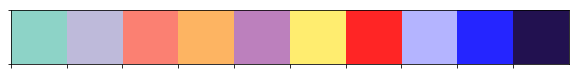

In [2]:
p2 = seaborn.color_palette('magma')
p3 = seaborn.color_palette('seismic_r')
colors = [0,2,3,5,9,11]
pallette = [seaborn.color_palette('Set3', 16)[i] for i in colors]
pallette.append(p3[1])
pallette.append(p3[3])
pallette.append(p3[4])
pallette.append(p2[0])
seaborn.palplot(pallette)

#Pale Green, Pale purple, Pale red, Light orange, Light violet, Light Yellow, Red, Light blue, Blue, Navy

In [188]:
btudata = pandas.read_csv('../data/btu.csv').dropna()

In [189]:
btudata_total = btudata[['state','Moisture','Vol','Ash','Hydrogen','Carbon','Nitrogen','Oxygen','Total Sulfur','Hocbtu']]

In [190]:
btudata_total['Hocbtu'] = btudata_total.apply(lambda x: x['Hocbtu']/1000,axis = 1)

In [191]:
btudata_total

,state,Moisture,Vol,Ash,Hydrogen,Carbon,Nitrogen,Oxygen,Total Sulfur,Hocbtu
0,Alabama,2.10,34.90,27.60,4.20,52.70,1.20,3.80,10.50,10.029
1,Alabama,0.90,38.40,15.50,4.80,65.90,1.10,2.50,10.30,12.379
2,Alabama,1.20,34.40,22.60,4.60,60.50,1.10,1.60,9.60,11.185
3,Alabama,1.70,30.80,25.90,4.50,56.30,1.40,2.70,9.20,10.499
4,Alabama,1.40,27.50,29.40,3.90,53.90,1.20,2.50,9.10,10.002
5,Alabama,1.30,30.50,26.20,4.10,57.10,1.20,2.60,8.70,10.601
6,Alabama,1.70,32.50,22.60,4.40,58.00,1.20,5.30,8.50,10.974
7,Alabama,1.80,29.40,18.20,4.50,61.00,1.20,6.80,8.30,11.200
8,Alabama,2.00,38.40,16.70,4.70,63.20,1.40,5.80,8.20,12.095
9,Alabama,1.40,32.70,20.00,4.60,62.70,1.40,3.20,8.10,11.666


### Heatmap of correlation between features

Text(0.5, 1.0, 'features correlation heatmap')

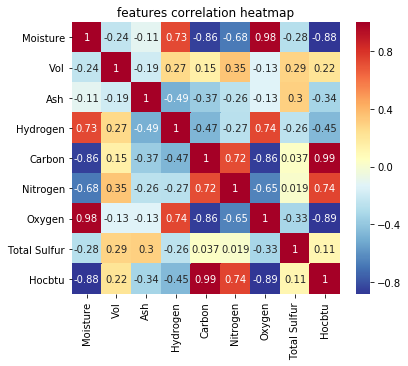

In [192]:
import seaborn as sns
data = btudata_total

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,5))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlBu_r")
plt.title("features correlation heatmap")

### MLP

In [193]:
from sklearn.model_selection import train_test_split

datasetX = btudata_total.iloc[:,1:9]
datasety = btudata_total[['Hocbtu']]
X_train, X_test , y_train, y_test = train_test_split(datasetX,datasety,test_size = .2)

In [194]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

nn = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

n = nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)

0.9958008966517666


In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

cv = KFold(10 ,shuffle=True, random_state=42)
score = cross_val_score(nn, datasetX, datasety , cv=cv)
score

array([0.9969128 , 0.99789013, 0.99483075, 0.99749461, 0.99727437,
       0.99617557, 0.98980807, 0.99606961, 0.99450693, 0.99758988])

In [196]:
pred = pandas.DataFrame(y_pred)
pred = pred.rename(columns={0:'Hocbtu'})

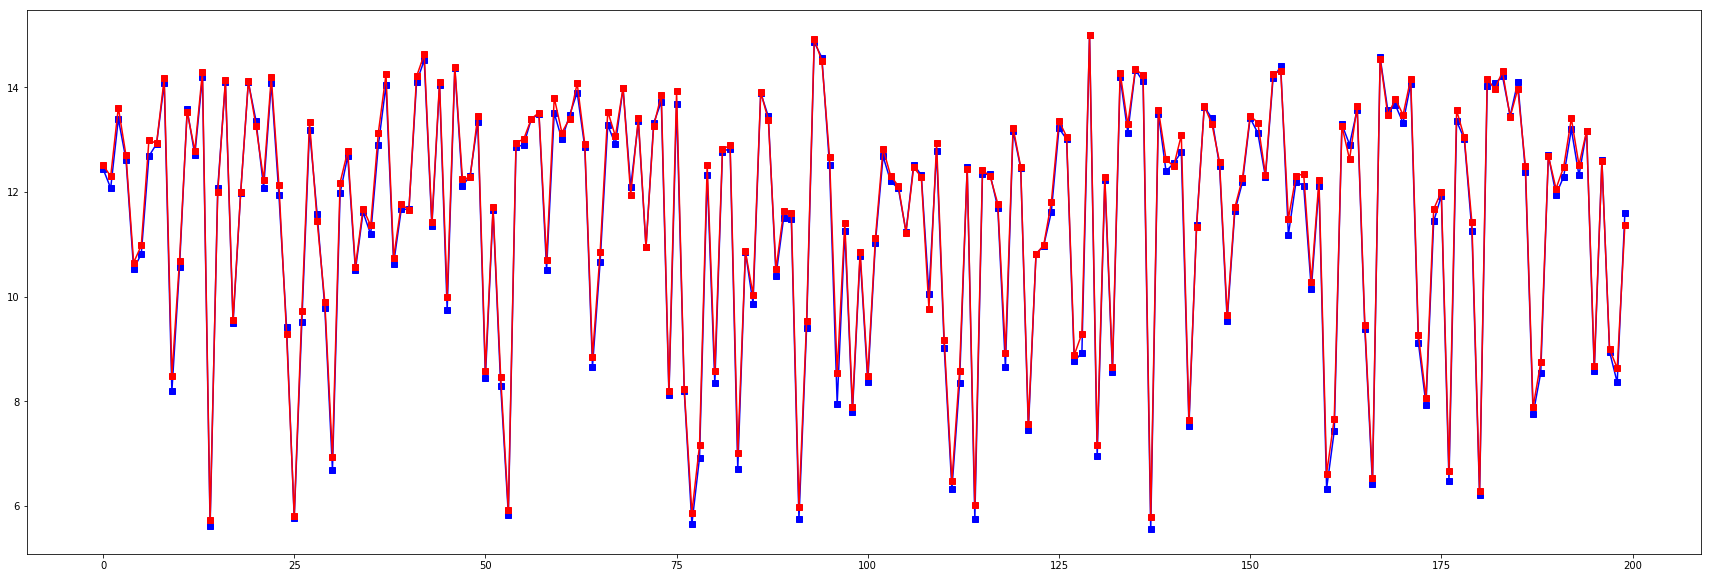

In [216]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
ax1.plot(y_test.reset_index()[['Hocbtu']].iloc[0:200,:], c='b', marker="s", label='real')
ax1.plot(pred.iloc[0:200,:], c='r', marker="s", label='pred')
plt.show()

In [198]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [199]:
result = pandas.concat([ y_test.reset_index()[['Hocbtu']] , pred.rename(columns={'Hocbtu':'hocpred'})],axis=1)

In [201]:
mean_absolute_percentage_error(result['Hocbtu'], result['hocpred'])

1.1771446219029627

### Decision Tree Regressor

In [203]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print("Score = {}".format(score))

Score = 0.9944350702560826


### Bayesian Model

In [204]:
from sklearn.linear_model import BayesianRidge

br_model = BayesianRidge()
br_model.fit(X_train,y_train)

y_pred = br_model.predict(X_test)
score = r2_score(y_test, y_pred)

print("Score = {}".format(score))

Score = 0.9976632000865304


### Keras Deep Model

In [205]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [207]:
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [209]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)

In [211]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, datasetX, datasety, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.02 (0.01) MSE


In [213]:
estimator.fit(X_train,y_train)

Score = 0.9976632000865304


In [214]:
y_pred = estimator.predict(X_test)
score = r2_score(y_test, y_pred)

print("Score = {}".format(score))

Score = 0.9967202233164989
